In [1]:
import pickle #read pickle file
import coffea
from coffea import hist
import topcoffea.modules.HistEFT as HistEFT
import topcoffea.modules.eft_helper as efth
import gzip #read zipped pickle file
import matplotlib.pyplot as plt #plot histograms
from matplotlib.backends.backend_pdf import PdfPages
import topcoffea.modules.utils as utils
import mplhep as hep
import numpy as np

/afs/crc.nd.edu/user/h/hnelson2/miniconda3/envs/ttbarEFT-env/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
hep.style.use("CMS")
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize':20}
plt.rcParams.update(params)

In [4]:
fin = "S1_sow.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'sow': <HistEFT (sample,sow) instance at 0x7f5ba9092c40>, 'nevents': <HistEFT (sample,nevents) instance at 0x7f5be4041c70>, 'njets': <HistEFT (sample,njets) instance at 0x7f5ba90a40d0>}


In [21]:
wc_pts = {"ctGIm": 0.0, "ctGRe":0.0, "cQj38": 0.0, "cQj18": 0.0,
            "cQu8": 0.0, "cQd8": 0.0, "ctj8": 0.0, "ctu8": 0.0,
            "ctd8": 0.0, "cQj31": 0.0, "cQj11": 0.0, "cQu1": 0.0,
            "cQd1": 0.0, "ctj1": 0.0, "ctu1": 0.0, "ctd1": 0.0}

In [47]:
h = hists['sow']
print(h._wcs)
print(h.values())
# fig, ax = plt.subplots(1,1)
# hist.plot1d(h, ax=ax, stack=True)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{('TT01j2l_S1',): array([0.77111115])}


In [75]:
wc_range = np.arange(-1.0,7.1,0.1)
weights_lst = []
for i in wc_range:
    wc_pts.update({"ctGRe":i})
    h.set_wilson_coefficients(**wc_pts)
    # print(h._wcs)
    weight = h.values()
    weights_lst.extend([list(w)[0] for w in weight.values()])
# print(weights_lst)

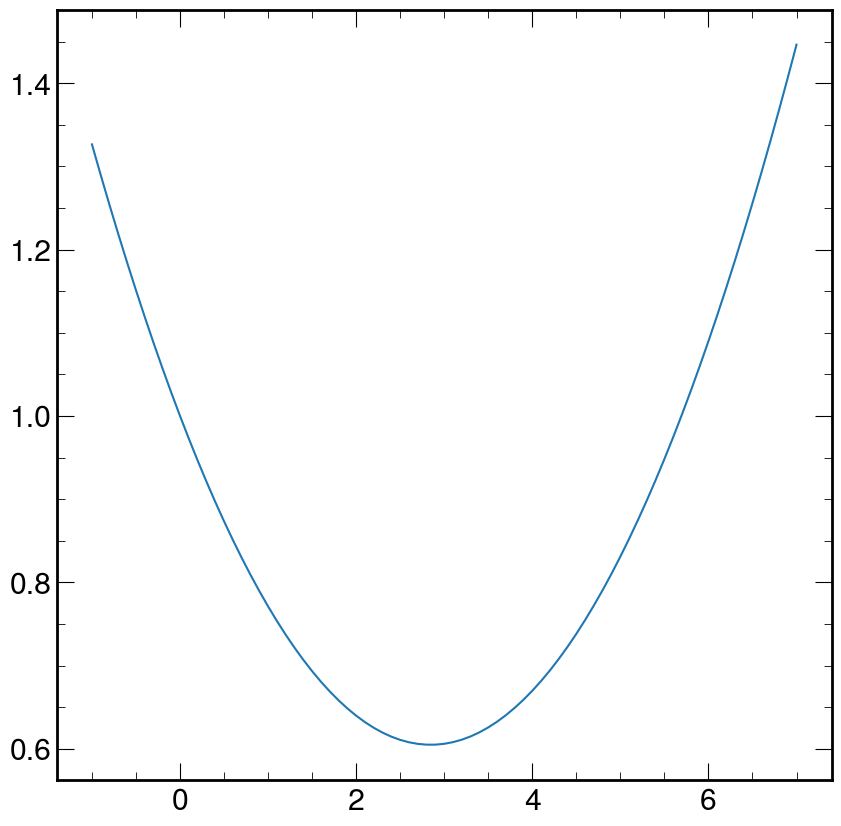

In [76]:
fig, ax = plt.subplots()
ax.plot(wc_range, weights_lst)


['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
